In [1]:
# Importing the Pandas Library for loading our dataset
# Grab The Data Here - https://www.kaggle.com/tarunpaparaju/apple-aapl-historical-stock-data

import pandas as pd

df = pd.read_csv('/content/HistoricalQuotes.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
df.shape

(2518, 6)

In [4]:
data = df.reset_index()[' Close/Last'] # Make Sure You add a space
data.head()

0     $273.36
1     $273.52
2     $292.65
3     $288.08
4     $298.18
Name:  Close/Last, dtype: object

In [5]:
df3 = data.reindex(index=data.index[::-1])
df3.head()

2517     $29.8557
2516     $29.8357
2515     $29.9043
2514     $30.1014
2513     $31.2786
Name:  Close/Last, dtype: object

In [6]:
df2 = []

for i in data:
    i = i[2:]
    i = float(i)
    df2.append(i)

df2.reverse()

df1 = pd.DataFrame(df2)[0]
df1.head()

0    29.8557
1    29.8357
2    29.9043
3    30.1014
4    31.2786
Name: 0, dtype: float64

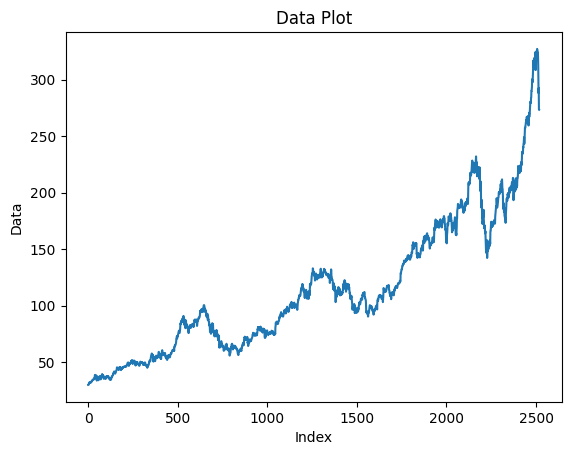

In [7]:
# Using the Matplotlib Library for visualizing our time-series data

import matplotlib.pyplot as plt

plt.title("Data Plot")
plt.xlabel("Index")
plt.ylabel("Data")
plt.plot(df1)

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df1, test_size=0.20, shuffle=False)

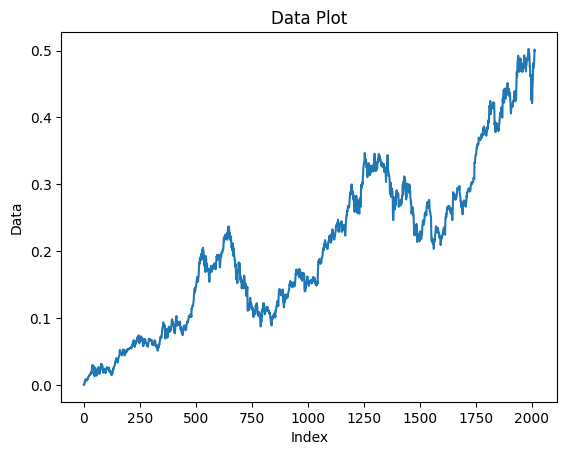

In [10]:
plt.title("Data Plot")
plt.xlabel("Index")
plt.ylabel("Data")
plt.plot(X_train)

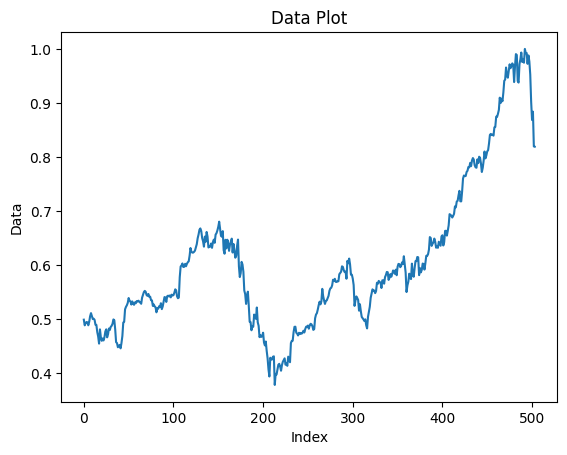

In [11]:
plt.title("Data Plot")
plt.xlabel("Index")
plt.ylabel("Data")
plt.plot(X_test)

In [12]:
X_train_data = []
Y_train_data = []
X_test_data = []
Y_test_data = []

train_len = len(X_train)
test_len = len(X_test)

# Create the training dataset
for i in range(train_len-101):
    a = X_train[i:(i+100), 0]
    X_train_data.append(a)
    Y_train_data.append(X_train[i + 100, 0])

# Create the test dataset
for j in range(test_len-101):
    b = X_test[j:(j+100), 0]
    X_test_data.append(a)
    Y_test_data.append(X_test[j + 100, 0])

X_train_data = np.array(X_train_data)
Y_train_data = np.array(Y_train_data)
X_test_data = np.array(X_test_data)
Y_test_data = np.array(Y_test_data)

In [13]:
X_train_data[0]
Y_train_data[0]

0.024104103955989345

In [14]:
X_train_data[1]
Y_train_data[1]

0.024544304746736592

In [15]:
### Printing the training and testing shapes

print("Training size of data = ", X_train_data.shape)
print("Training size of labels = ", Y_train_data.shape)
print("Training size of data = ", X_test_data.shape)
print("Training size of labels = ", Y_test_data.shape)

Training size of data =  (1913, 100)
Training size of labels =  (1913,)
Training size of data =  (403, 100)
Training size of labels =  (403,)


In [16]:
### Converting the training and testing data shapes into a 3-dimensional space to make it suitable for LSTMs

X_train_data = X_train_data.reshape(1913, 100, 1)
X_test_data = X_test_data.reshape(403, 100, 1)

print(X_train_data.shape)
print(X_test_data.shape)

(1913, 100, 1)
(403, 100, 1)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Build The Architecture

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


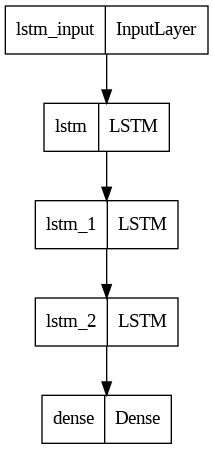

In [19]:
# Plot the Model

from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [20]:
# Initializing the callbacks

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("checkpoint1.h5", monitor='val_loss', verbose=1,
                              save_best_only=True, mode='auto')

logdir='logs1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [21]:
# Model Compilation

model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
# Training The Model

model.fit(X_train_data,
          Y_train_data,
          validation_data=(X_test_data, Y_test_data),
          epochs=20,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoint, tensorboard_Visualization])

Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 0.0027
Epoch 1: val_loss improved from inf to 0.05182, saving model to checkpoint1.h5
60/60 [==============================] - 15s 182ms/step - loss: 0.0027 - val_loss: 0.0518
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 2.2939e-04
Epoch 2: val_loss improved from 0.05182 to 0.04502, saving model to checkpoint1.h5
60/60 [==============================] - 10s 168ms/step - loss: 2.2939e-04 - val_loss: 0.0450
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 2.7063e-04
Epoch 3: val_loss did not improve from 0.04502
60/60 [==============================] - 10s 168ms/step - loss: 2.7063e-04 - val_loss: 0.0475
Epoch 4/20
60/60 [==============================] - ETA: 0s - loss: 1.8813e-04
Epoch 4: val_loss did not improve from 0.04502
60/60 [==============================] - 10s 166ms/step - loss: 1.8813e-04 - val_loss: 0.0502
Epoch 5/20
60/60 [==============================] - ETA: 0s 

In [23]:
train_predict = model.predict(X_train_data)
test_predict = model.predict(X_test_data)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

13/13 [==============================] - 1s 41ms/step


In [24]:
# Calculate RMSE performance metrics for train and test data

import math
from sklearn.metrics import mean_squared_error

print("Train MSE = ", math.sqrt(mean_squared_error(Y_train_data, train_predict)))
print("Test MSE = ", math.sqrt(mean_squared_error(Y_test_data, test_predict)))

Train MSE =  101.06077323929732
Test MSE =  177.48364409966305


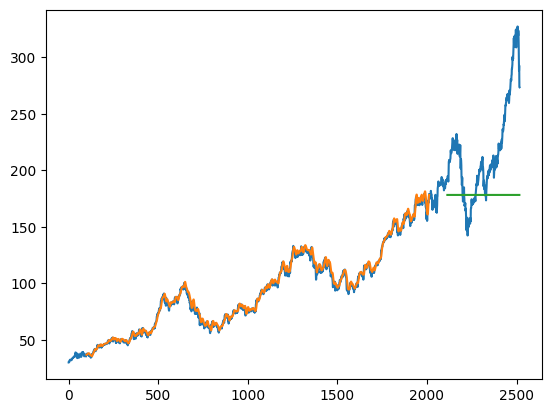

In [28]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()